# Introducción a TensorFlow

<img src="figuras/tensorflow.png" width="25%">

### ¿Qué es TensorFlow?

TensorFlow se describe como "una interfaz para expresar algoritmos de aprendizaje automático y una implementación para ejecutar dichos algoritmos". Su principal ventaja sobre otros frameworks es lo fácil que es ejecutar el código en una amplia gama de dispositivos. Esto está relacionado con la motivación inicial para su desarrollo, antes de que fuera de código abierto. Inicialmente, Google desarrolló TensorFlow para cerrar la brecha entre la investigación y la producción, y aspiraba a un ideal en el que no se debían realizar modificaciones al código para pasar de la investigación a la producción. Para lograr esto, TensorFlow implementa un grafo computacional de tu código, estás definiendo y solo definiendo ese grafo: el flujo de tensores.

### ¿Qué es un Tensor?

Al igual que un vector puede considerarse como una matriz, o una lista, de escalares (números ordinarios como 1, 2 y PI), y las matrices pueden considerarse matrices de vectores, un tensor puede considerarse como un matriz de matrices. Entonces un tensor es realmente solo una matriz n-dimensional. Resulta, como veremos en los ejemplos de codificación, que esta arquitectura tiene mucho sentido cuando se trabaja con el aprendizaje automático.

En TensorFlow, los tensores se describen mediante una unidad de dimensionalidad conocida como orden. El orden de Tensor no es lo mismo que el orden de la matriz. El orden del tensor es el número de dimensiones del tensor.

Un tensor de orden dos es lo que típicamente pensamos como una matriz, un tensor de orden uno es un vector. Para un tensor de orden dos, puede acceder a cualquier elemento con la sintaxis `t[i, j]`. Para un tensor de orden tres, los elementos de direccionan con `t[i, j, k]`.

<img src="figuras/tensor_rank.png" width="75%">

### Grafo Computacional en TensorFlow

TensorFlow nos permite implementar algoritmos de aprendizaje automático mediante la creación y el cálculo de operaciones que interactúan entre sí. Estas interacciones forman lo que llamamos un "grafo computacional", con el cual podemos intuitivamente representar arquitecturas funcionales complicadas.

Un grafo se refiere a un conjunto de entidades interconectadas, comúnmente llamadas nodos o vértices. Estos nodos están conectados entre sí a través de las aristas. En un grafo de flujo de datos, las aristas permiten que los datos "fluyan" de un nodo a otro de una manera dirigida.

En TensorFlow, cada uno de los nodos del grafo representa una operación, posiblemente aplicada a alguna entrada, y puede generar un resultado que se transmite a otros nodos. Por analogía, podemos pensar en el grafo computacional como una línea de ensamblaje donde cada máquina (nodo) obtiene o crea su materia prima (entrada), la procesa y luego pasa la salida a otras máquinas de manera ordenada.

Considere la siguiente expresión:

$$f = \frac{1}{1+exp^{-(w_0x_0+w_1x_1+w_2)}}$$

Podemos dividir esta función en los siguientes componentes:

$$operacion_1 = w_0 \times x_0$$

$$operacion_2 = w_1 \times x_1$$

$$operacion_3 = operacion_1 + operacion_2$$

$$operacion_4 = operacion_3 + w_2$$

$$operacion_5 = -1 \times operacion_4$$

$$operacion_6 = exp^{operacion_5}$$

$$operacion_7 = 1 + operacion_6$$

$$f = \frac{1}{operacion_7}$$

Ahora podemos representar estas operaciones en un grafo:

<img src="figuras/GrafoSigmoide.png" width="75%">

Esto puede parecer un ejemplo tonto, pero observe una idea poderosa al expresar la ecuación de esta manera: dos de los cálculos ($operacion_1 = w_0 \times x_0$ y $operacion_2 = w_1 \times x_1$) se pueden realizar en paralelo. Al dividir estos cálculos entre CPU o GPU, esto puede darnos ganancias significativas en tiempos de computación. Estas ganancias son imprescindibles para aplicaciones de datos masivos (big data) y aprendizaje profundo, especialmente para arquitecturas de redes neuronales complicadas como las Redes Neuronales Convolucionales (CNN) y las Redes Neuronales Recurrentes (RNN). La idea detrás de TensorFlow es la capacidad de crear estos gráficos computacionales en código y permitir importantes mejoras de rendimiento a través de operaciones paralelas y otras ganancias de eficiencia.

Los flujos de datos tiene varias ventajas que TensorFlow aprovecha al ejecutar sus programas:
- **Paralelismo**. Al usar aristas explícitas para representar dependencias entre operaciones, es fácil para el sistema identificar operaciones que pueden ejecutarse en paralelo.
- **Ejecución distribuida**. Al usar aristas explícitas para representar los valores que fluyen entre las operaciones, es posible que TensorFlow particione su programa en varios dispositivos (CPU, GPU y TPU) conectados a diferentes máquinas. TensorFlow inserta la comunicación y coordinación necesarias entre los dispositivos.
- **Compilación**. El compilador XLA de TensorFlow puede usar la información en su grafo de flujo de datos para generar código más rápido, por ejemplo, fusionando operaciones adyacentes.
- **Portabilidad**. El grafo de flujo de datos es una representación independiente del lenguaje del código en su modelo. Puede construir un gráfico de flujo de datos en Python, almacenarlo en un `SavedModel` y restaurarlo en un programa C ++ para una inferencia de baja latencia.

A continuación podemos ver un grafo similar en TensorFlow, que muestra el grafo computacional de una red neuronal de tres capas:

<img src="figuras/TensorFlow-data-flow-graph.gif" width="25%">

La animación del flujos de datos entre los diferentes nodos en el grafo son tensores que son matrices de datos multidimensionales. Por ejemplo, el tensor de datos de entrada puede ser de 5000 x 64 x 1, que representa una capa de entrada de 64 nodos con 5000 muestras de entrenamiento. Después de la capa de entrada, hay una capa oculta con unidades lineales rectificadas (ReLU) como función de activación. Hay una capa de salida final (llamada "capa de logit" en el grafo anterior) que usa la entropía cruzada como una función de costo / pérdida. En cada punto vemos los tensores relevantes que fluyen al bloque "Gradientes" que finalmente fluyen al optimizador de Descenso Gradual Estocástico que realiza la propagación hacia atrás y el descenso del gradiente.

Aquí podemos ver cómo los grafos computacionales se pueden usar para representar los cálculos en redes neuronales, y esto, por supuesto, es en lo que sobresale TensorFlow. Veamos cómo realizar algunas operaciones matemáticas básicas en TensorFlow para tener una idea de cómo funciona todo.

### Ejemplo de TensorFlow

Primero hagamos que TensorFlow realice el cálculo de la siguiente función: $f = \frac{1}{1+exp^{-(w_0x_0+w_1x_1+w_2)}}$. Primero, debemos introducir a las variables y constantes de TensorFlow. Vamos a declararlas y luego se explicará la sintaxis:

In [1]:
# importar tensorflow
import tensorflow as tf
import numpy as np
import datetime
tf.__version__

/Users/wladimir/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.6.0'

In [2]:
# crear las constantes
uno = tf.constant(1.0, name="uno")
menos_uno = tf.constant(-1.0, name="menos_uno")

# crear las variables
w0 = tf.Variable(2.0, name='w0')
x0 = tf.Variable(-1.0, name='x0')
w1 = tf.Variable(-3.0, name='w1')
x1 = tf.Variable(-2.0, name='x1')
w2 = tf.Variable(-3.0, name='w2')

Como se puede observar anteriormente, las constantes de TensorFlow se pueden declarar utilizando la función `tf.constant` y las variables con la función `tf.Variable`. El primer elemento en ambos es el valor que se le asignará a la constante/variable cuando se inicializa. La segunda es una cadena de nombre opcional que se puede utilizar para etiquetar la constante/variable; esto es útil para cuando se quiere hacer visualizaciones. TensorFlow deducirá el tipo de la constante/variable a partir del valor inicial, pero también se puede establecer explícitamente utilizando el argumento opcional `dtype`. TensorFlow tiene muchos de sus propios tipos, como `tf.float32`, `tf.int32`, etc.

Es importante tener en cuenta que, como el código de Python se ejecuta a través de estos comandos, las variables no se han declarado realmente como lo habrían sido si hubiera sido una declaración de Python estándar (es decir, b = 2.0). En cambio, todas las constantes, variables, operaciones y el grafo computacional solo se crean cuando se ejecutan los comandos de inicialización.

A continuación, creamos las operaciones de TensorFlow:

In [2]:
# ahora se crean las operaciones
operacion1 = tf.multiply(w0, x0, name='operacion1')
operacion2 = tf.multiply(w1, x1, name='operacion2')
operacion3 = tf.add(operacion1, operacion2, name='operacion3')
operacion4 = tf.add(operacion3, w2, name='operacion4')
operacion5 = tf.multiply(operacion4, menos_uno, name='operacion5')
operacion6 = tf.exp(operacion5, name='operacion6')
operacion7 = tf.add(operacion6, uno, name='operacion7')
f = tf.divide(uno, operacion7, name='f')

TensorFlow tiene una gran cantidad de operaciones disponibles para realizar todo tipo de interacciones entre variables, algunas de las cuales veremos más adelante. Las operaciones anteriores son bastante obvias, y crean las instancias de las operaciones.

El siguiente paso es configurar un objeto para inicializar las variables y la estructura del grafo:

In [3]:
# Inicialización de las variable
inicializar = tf.global_variables_initializer()

Ok, entonces ahora estamos listos para realizar la computación. Para ejecutar las operaciones entre las variables, necesitamos iniciar una sesión de TensorFlow - `tf.Session`. La sesión de TensorFlow es un objeto donde se ejecutan todas las operaciones. Usando la sintaxis `with` de Python, podemos ejecutar el gráfico con el siguiente código:

In [4]:
# arrancar la sesión
with tf.Session() as sess:
    writer = tf.summary.FileWriter("sigmoide", sess.graph)
    # inicializar las variables
    sess.run(inicializar)
    # computar la salida del grafo
    f_salida = sess.run(f)
    print("Variable f es {}".format(f_salida))

Variable f es 0.7310585975646973


El primer comando dentro del bloque `with` es la inicialización, que se ejecuta con el comando `run`. Luego queremos averiguar cuál debe ser el valor de la variable $f$. Todo lo que tenemos que hacer es ejecutar la operación que calcula $f$, por ejemplo, `f = tf.divide(uno, operacion7, name='f')`. Tenga en cuenta que $f$ es una operación, no una variable y, por lo tanto, se puede ejecutar. Hacemos eso con el comando `sess.run(f)` y asignamos el resultado a `f_salida`, cuyo valor luego imprimimos.

Observe algo interesante: definimos las operaciones $operacion1$, $operacion2$, $operacion3$, $operacion4$, $operacion5$, $operacion6$ y $operacion7$ que deben calcularse antes de poder determinar el valor de $f$. Sin embargo, no tenemos que ejecutar explícitamente esas operaciones, ya que TensorFlow sabe de qué otras operaciones y variables depende la operación $f$, y por lo tanto ejecuta las operaciones necesarias por sí mismo. Hace esto a través de su grafo de flujo de datos que muestra todas las dependencias requeridas. Usando la funcionalidad TensorBoard, podemos ver el grafo que TensorFlow creó para este pequeño programa:

<img src="figuras/Grafo_f.png" width="75%">

¿Y si tuviéramos un arreglo de valores $w_2$ para calcular el valor de una vez más?

### El marcador de posición "Placeholder" de TensorFlow

Digamos también que no sabíamos cuál sería el valor del arreglo $b$ durante la fase de declaración del problema TensorFlow (es decir, antes de la etapa `tf.Sesión() as sess`). En este caso, TensorFlow nos exige que declaremos la estructura básica de los datos mediante el uso de la declaración de variable `tf.placeholder`. Vamos a usarlo para $b$:

In [4]:
# crear placeholder
w2 = tf.placeholder(tf.float32, [None, 1], name='w2')

Debido a que no proporcionamos una inicialización en esta declaración, debemos decirle a TensorFlow qué tipo de datos va a ser cada elemento dentro del tensor. En este caso, queremos usar `tf.float32`. El segundo argumento es la forma de los datos que serán "inyectados" en esta variable. En este caso, queremos utilizar una matriz de tamaño (? X 1), porque estamos siendo cautelosos sobre la cantidad de datos que estamos suministrando a esta variable (de ahí el "?"), El marcador de posición está dispuesto a aceptar un argumento `None` en la declaración de tamaño. Ahora podemos inyectar tantos datos unidimensionales como queramos en la variable `w2`.

El único cambio que debemos hacer en nuestro programa está en el comando `sess.run (f, ...)`:

In [6]:
# crear las constantes
uno = tf.constant(1.0, name="uno")
menos_uno = tf.constant(-1.0, name="menos_uno")

# crear las variables
w0 = tf.Variable(2.0, name='w0')
x0 = tf.Variable(-1.0, name='x0')
w1 = tf.Variable(-3.0, name='w1')
x1 = tf.Variable(-2.0, name='x1')

# ahora se crean las operaciones
operacion1 = tf.multiply(w0, x0, name='operacion1')
operacion2 = tf.multiply(w1, x1, name='operacion2')
operacion3 = tf.add(operacion1, operacion2, name='operacion3')
operacion4 = tf.add(operacion3, w2, name='operacion4')
operacion5 = tf.multiply(operacion4, menos_uno, name='operacion5')
operacion6 = tf.exp(operacion5, name='operacion6')
operacion7 = tf.add(operacion6, uno, name='operacion7')
f = tf.divide(uno, operacion7, name='f')

# Inicialización de las variable
inicializar = tf.global_variables_initializer()

# arrancar la sesión
with tf.Session() as sess:
    archivo="./summary_log/ejecucion_"+datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%s")
    writer = tf.summary.FileWriter(archivo, sess.graph)
    # inicializar las variables
    sess.run(inicializar)
    # computar la salida del grafo
    f_salida = sess.run(f, feed_dict={w2: np.arange(-5, 5)[:, np.newaxis]})
    print("Variable f es {}".format(f_salida))

Variable f es [[0.26894143]
 [0.5       ]
 [0.7310586 ]
 [0.880797  ]
 [0.95257413]
 [0.98201376]
 [0.9933072 ]
 [0.9975274 ]
 [0.999089  ]
 [0.99966466]]


### Ejemplo de una Red Neuronal con TensorFlow

Ahora veremos un ejemplo de la creación de una red neuronal simple de tres capas en TensorFlow. En este ejemplo, usaremos el conjunto de datos MNIST (y su cargador asociado) que proporciona el paquete TensorFlow. Este conjunto de datos MNIST es un conjunto de imágenes en escala de grises de 28 × 28 píxeles que representan dígitos escritos a mano. Tiene 55,000 filas de entrenamiento, 10,000 filas de prueba y 5,000 filas de validación.

Cargaremos los datos ejecutando:

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Tamaños de los onjuntos de entrenamiento, validación y prueba:

In [3]:
print("Tamaño de:")
print("- Conjunto de entrenamiento:\t{}".format(len(mnist.train.labels)))
print("- Conjunto de prueba:\t\t{}".format(len(mnist.test.labels)))
print("- Conjunto de validación:\t{}".format(len(mnist.validation.labels)))

Tamaño de:
- Conjunto de entrenamiento:	55000
- Conjunto de prueba:		10000
- Conjunto de validación:	5000


### Codificación "One-Hot"


El argumento `one_hot=True` especifica que en lugar de que las etiquetas asociadas a cada imagen sean el dígito en sí, es decir "4", es un vector con un nodo "caliente" y todos los otros nodos serán cero, es decir, [0, 0, 0, 0 , 1, 0, 0, 0, 0, 0]. Esto nos permite alimentarlo fácilmente a la capa de salida de nuestra red neuronal.

In [4]:
mnist.test.labels[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

Para convertir la codificacioón de los dígitos de "One-Hot" a un sólo número, se busca el indice del elemento mayor:

In [5]:
digitos = np.array([label.argmax() for label in mnist.test.labels])
digitos[0:5]

array([7, 2, 1, 0, 4])

### Inicializar variables y "placeholders"

A continuación, podemos configurar las variables de marcador de posición para los datos de entrenamiento (y algunos hiperparámetros de entrenamiento):

In [6]:
# Hiperparámetros de la red neuronal
tasa_aprendizaje = 0.5
epocas = 30
tamaño_lote = 100


# declarar los placeholders para los datos de entrenamiento
# entrada x - para 28 x 28 pixels = 784
x = tf.placeholder(tf.float32, [None, 784])
# declarar el placeholder de los datos de salida - 10 dígitos
y = tf.placeholder(tf.float32, [None, 10])

Observe que la capa de entrada $x$ es 784 nodos correspondientes a los 28 x 28 (= 784) píxeles, y la capa de salida $y$ es de 10 nodos correspondientes a los 10 dígitos posibles. De nuevo, el tamaño de $x$ es (None X 784), donde el None significa que se ingresará una cantidad de muestras aún no especificada.

Ahora necesitamos configurar las variables de pesos y sesgo para la red neuronal de tres capas. Siempre hay un número $L-1$ de tensores de pesos/sesgo, donde $L$ es el número de capas. Entonces, en este caso, necesitamos configurar dos tensores para cada uno:

In [7]:
# declarar los pesos conectando la capa de entrada con la capa oculta
W1 = tf.Variable(tf.random_normal([784, 300], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([300]), name='b1')
# y los pesos conectando la capa oculta con la capa de salidad
W2 = tf.Variable(tf.random_normal([300, 10], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([10]), name='b2')

A continuación, tenemos que configurar las entradas netas a los nodos y las funciones de activación de los nodos de capa oculta:

In [8]:
# calcular la activación de la capa oculta
oculta_entrada = tf.add(tf.matmul(x, W1), b1)
oculta_activacion = tf.nn.relu(oculta_entrada)

La función de activación a utilizar en la capa oculta es ReLU (Rectified Linear Unit):

<img src="figuras/relu.png" width="50%">

TensorFlow tiene la función de activación ReLU ya configurada, `tf.nn.relu`.

Ahora, configuremos la capa de salida, `y_`:

In [9]:
# calcular la activación de la capa de salida - usando la función de activación softmax
activacion_salida = tf.nn.softmax(tf.add(tf.matmul(oculta_activacion, W2), b2))

En matemáticas, la función softmax, o función exponencial normalizada, es una generalización de la función logística. Se emplea para "comprimir" un vector K-dimensional, $z$, de valores reales arbitrarios en un vector K-dimensional, $\sigma(z)$, de valores reales en el rango [0, 1]. La función está dada por:

$$\sigma(z)_j=\frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}\ \ para\ j=1,\dots,K.$$

Podemos usar la función softmax de TensorFlow `tf.nn.softmax`.

También debemos incluir una función de costo o pérdida para poder realizar la propagación hacia atrás. Aquí usaremos la función de costo de entropía cruzada, representada por:

$$J(\boldsymbol{w})=-\frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{n}y^{[i]}log(a^{[i]}_j)+(1-y^{[i]}_j)log(1-a^{[i]}_j)$$

Podemos implementar esta función de costo de entropía cruzada en TensorFlow con el siguiente código:

In [10]:
activacion_salida_cortada = tf.clip_by_value(activacion_salida, 1e-10, 0.9999999)
costo = -tf.reduce_mean(tf.reduce_sum(y * tf.log(activacion_salida_cortada)
                         + (1 - y) * tf.log(1 - activacion_salida_cortada), axis=1))
tf.summary.scalar('costo', costo)

<tf.Tensor 'costo:0' shape=() dtype=string>

La primera línea es una operación que convierte la salida `activacion_salida` en una versión recortada, limitada entre 1e-10 y 0.999999. Esto es para asegurarnos de que nunca tengamos el caso durante el entrenamiento de $log(0)$ si esto ocurre, esto devolvería NaN y detendría el proceso de entrenamiento. La segunda línea es el cálculo de entropía cruzada.

Para realizar este cálculo, primero usamos la función `tf.reduce_sum` de TensorFlow, esta función básicamente toma la suma de un eje dado del tensor que se suministra. En este caso, el tensor que se suministra es el cálculo de entropía cruzada elemento por elemento para un solo nodo y una muestra de entrenamiento, es decir: $y^{[i]}log(a^{[i]}_j)+(1-y^{[i]}_j)log(1-a^{[i]}_j)$. Recuerde que `activacion_salida` y `activacion_salida_cortada` en el cálculo anterior son tensores `(m x 10)`, por lo tanto, necesitamos realizar la primera suma sobre el segundo eje. Esto se especifica utilizando el argumento `axis=1`.

Después de esta operación, tenemos un tensor `(m x 1)`. Para tomar la media de este tensor y completar nuestro cálculo del costo de entropía cruzada (es decir, ejecutar esta parte $-\frac{1}{m}\sum_{i=1}^{m}$), utilizamos la función `tf.reduce_mean` de TensorFlow. Esta función simplemente toma la media del tensor que le proporcione. Entonces ahora tenemos una función de costo que podemos usar en el proceso de entrenamineto.

Ahora vamos a configurar el optimizador en TensorFlow:

In [11]:
# agregar un optimizador
optimizador = tf.train.GradientDescentOptimizer(learning_rate=tasa_aprendizaje).minimize(costo)

Estamos usando el optimizador de descenso de gradiente proporcionado por TensorFlow. Lo inicializamos con una tasa de aprendizaje, luego especificamos lo que queremos que haga, es decir, minimizar la operación de costo de entropía cruzada que creamos. Esta función luego realizará el descenso de gradiente y la propagación hacia atrás.

Finalmente configuremos la operación de inicialización variable y una operación para medir la precisión de nuestras predicciones:

In [12]:
# inicializar las variables
inicializar = tf.global_variables_initializer()

# definir la operación de exactitud
prediccion_corecta = tf.equal(tf.argmax(y, 1), tf.argmax(activacion_salida, 1))
exactitud = tf.reduce_mean(tf.cast(prediccion_corecta, tf.float32))

La operación `predicción_correcta` hace uso de la función `tf.equal` TensorFlow que devuelve True o False dependiendo de si los argumentos proporcionados son iguales. La función `tf.argmax` devuelve el índice del valor máximo en un vector/tensor. Por lo tanto, la operación de `predicción_correcta` devuelve un tensor de tamaño `(m x 1)` de valores True y False que indica si la red neuronal ha predicho correctamente el dígito. Luego queremos calcular la precisión media de este tensor: primero tenemos que convertir el tipo de la operación de `predicción_correcta` de un `Boolean` a un `float` de TensorFlow para realizar la operación `reduce_mean`. Una vez que hayamos hecho eso, ahora tenemos una operación de precisión lista para evaluar el rendimiento de la red neuronal.

### Configurar el entrenamiento

Ahora tenemos todo lo que necesitamos para configurar el proceso de entrenamiento de nuestra red neuronal

In [13]:
# add a summary to store the accuracy
tf.summary.scalar('exactitud', exactitud)

<tf.Tensor 'exactitud:0' shape=() dtype=string>

In [17]:
# arrancar la sesión
with tf.Session() as sess:
    # inicializar las variables
   
    archivo="./summary_MNIST/ejecucion_"+datetime.datetime.now().strftime("%Y-%m-%d--%H-%M")
    writer = tf.summary.FileWriter(archivo, sess.graph)
    sess.run(inicializar)
    total_lotes = int(len(mnist.train.labels) / tamaño_lote)
    for epoca in range(epocas):
        costos = []
        costo_epoca = 0
        for i in range(total_lotes):
            merged = tf.summary.merge_all()
            lote_x, lote_y = mnist.train.next_batch(batch_size=tamaño_lote)
            summary, _, c = sess.run([merged, optimizador, costo], feed_dict={x: lote_x, y: lote_y})
            costo_epoca += c
            writer.add_summary(summary, epoca)
        #costo_promedio /= total_lotes
        costos.append(costo_epoca)
        print("Epoca:", (epoca + 1), "costo =", "{:.4f}".format(costo_epoca))
        
        print(sess.run([costo, exactitud], feed_dict={x: mnist.validation.images, y: mnist.validation.labels}))
        print(sess.run([costo, exactitud], feed_dict={x: mnist.train.images, y: mnist.train.labels}))
       

    print("\nEntrenamiento finalizado!")
    print(sess.run([costo, exactitud], feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Epoca: 1 costo = 329.1319
[0.26382506, 0.9548]
[0.25579408, 0.95503634]
Epoca: 2 costo = 125.8674
[0.17853291, 0.972]
[0.1510172, 0.97441816]
Epoca: 3 costo = 93.3478
[0.16695322, 0.973]
[0.12142181, 0.97996366]
Epoca: 4 costo = 73.4773
[0.15059155, 0.9774]
[0.09756623, 0.9827818]
Epoca: 5 costo = 59.0319
[0.15043469, 0.975]
[0.077541605, 0.9876]
Epoca: 6 costo = 49.8572
[0.1554486, 0.9768]
[0.07666577, 0.98752725]
Epoca: 7 costo = 41.7925
[0.15238985, 0.9748]
[0.05496138, 0.9908182]
Epoca: 8 costo = 35.5686
[0.1429199, 0.9766]
[0.04802882, 0.99203634]
Epoca: 9 costo = 29.5063
[0.13708124, 0.9782]
[0.03748573, 0.9940364]
Epoca: 10 costo = 25.2513
[0.14925934, 0.9772]
[0.03324899, 0.99527276]
Epoca: 11 costo = 19.1316
[0.14687075, 0.9762]
[0.030760175, 0.9954]
Epoca: 12 costo = 15.2280
[0.15102515, 0.9788]
[0.023488313, 0.9965636]
Epoca: 13 costo = 15.2654
[0.14260186, 0.9786]
[0.024203219, 0.99645454]
Epoca: 14 costo = 10.4007
[0.13999547, 0.979]
[0.015843838, 0.99807274]
Epoca: 15 cos

### Visualizar Grafo Computacional de la Red Neuronal

<img src='figuras/Grafo_RN_MNIST.png' width="100%"/>

### Visualizar Exactitud de Entrenamiento vs. Exactitud de Validación

In [25]:
exactitud_entrenamiento = [0, 0.95503634, 0.97441816, 0.97996366, 0.9827818, 0.9876, 0.98752725, 0.9908182,
 0.99203634, 0.9940364, 0.99527276, 0.9954, 0.9965636, 0.99645454, 0.99807274, 0.9984546, 0.99963635, 
 0.9996182, 0.99987274, 0.9998909, 0.99994546, 0.99996364, 0.9999091, 0.99996364, 0.9999818, 0.9999818, 
 0.9999818, 1.0, 1.0, 1.0, 1.0]

exactitud_validacion = [0, 0.9548, 0.972, 0.973, 0.9774, 0.975, 0.9768, 0.9748,
 0.9766, 0.9782, 0.9772, 0.9762, 0.9788, 0.9786, 0.979, 0.9794, 0.979, 
 0.979, 0.9804, 0.9808, 0.9812, 0.9806, 0.9802, 0.9806, 0.981, 0.9812, 
 0.9814, 0.9814, 0.9814, 0.9816, 0.982]

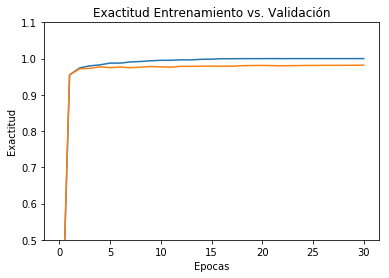

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(epocas + 1), exactitud_entrenamiento)
plt.plot(range(epocas + 1), exactitud_validacion)
plt.title('Exactitud Entrenamiento vs. Validación')
plt.ylabel('Exactitud')
plt.xlabel('Epocas')
plt.ylim([0.5, 1.1])
plt.show()